In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('/content/index_calculate_2.xlsx',sheet_name='Sheet2')

In [ ]:
df.drop(['Tumour types'],axis=1,inplace=True)


In [ ]:
df['Lip_inski'].replace(True,1,inplace=True)
df['Lip_inski'].replace(False,0,inplace=True)
df['Lip_inski_1'].replace(True,1,inplace=True)
df['Lip_inski_1'].replace(False,0,inplace=True)

<ipython-input-5-ad5b651e0da5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Lip_inski'].replace(True,1,inplace=True)
<ipython-input-5-ad5b651e0da5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Lip_inski'].replace(False,0,inplace=True)
<ipython-input-5-ad5b651e0da5>:3: FutureWarning: 

In [ ]:
df_cols=list(df.columns)
df_cols.remove('Top_PSA')

In [ ]:
from sklearn.model_selection import train_test_split
# X=df.iloc[:,:-2]
X=df[df_cols]
# 'Top_PSA'
y=df['Top_PSA']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# from sklearn.model_selection import train_test_split
# X=df.iloc[:,:-2]
# y=df.iloc[:,-2]
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# from sklearn.decomposition import PCA
# pca=PCA(n_components=20)
# pca.fit(X_train)
# X_train=pca.transform(X_train)
# X_test=pca.transform(X_test)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif=variance_inflation_factor()
vif=[]

for i in range(len(X.columns)):
  vif.append(variance_inflation_factor(X,i))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:
df_vif=pd.DataFrame({"vif":vif},index=X.columns).sort_values("vif",ascending=False)

In [ ]:
# df['Atom_Count']
df_vif['vif'].values

array([3.00239975e+15, 6.43371375e+14, 8.83058750e+13, 7.97097279e+13,
       1.15922770e+13, 2.89217432e+05, 6.84864897e+04, 4.40687056e+04,
       3.04625564e+04, 3.01262478e+04, 1.52392053e+04, 6.25424143e+03,
       6.13739610e+03, 5.65138232e+03, 5.57705639e+03, 3.81871300e+03,
       3.66682285e+03, 1.17569562e+03, 8.69969092e+02, 8.36247223e+02,
       8.21823125e+02, 7.99670020e+02, 7.89970720e+02, 7.58780927e+02,
       5.48781017e+02, 3.30657150e+02, 2.77148924e+02, 1.93706328e+02,
       1.70215083e+02, 1.05886018e+02, 9.81645907e+01, 8.98377235e+01,
       7.35381237e+01, 5.01764002e+01, 4.80039135e+01, 4.61746866e+01,
       4.51716446e+01, 3.77197169e+01, 3.74622913e+01, 3.51394476e+01,
       3.48407961e+01, 2.75078007e+01, 2.66433218e+01, 2.34568706e+01,
       2.22127887e+01, 2.00964694e+01, 1.19068410e+01, 1.10391983e+01,
       8.81596060e+00, 6.99899151e+00, 5.69200765e+00, 5.00852849e+00,
       3.99879283e+00, 3.71841667e+00, 1.85683121e+00,            nan,
      

In [ ]:
df_vif.index

Index(['Bond_Count', 'Walk_C', 'Path_Count', 'Atom_Count', 'Atom_Count_1',
       'Constitu_tional', 'Mc_GowanVolume', 'Moe_Type', 'Auto_correlation_4',
       'Z1', 'MW', 'Z2', 'Auto_correlation', 'Information_Content_1',
       'Information_Content_6', 'Auto_correlation_2', 'Polariz_ability',
       'Atom_Count_4', 'Auto_correlation_1', 'Arom_atic_1',
       'Polariz_ability_1', 'Information_Content_4', 'Arom_atic', 'Bertz_CT',
       'Auto_correlation_3', 'Information_Content_5', 'Information_Content_2',
       'Ring_Count', 'Moe_Type_2', 'Information_Content',
       'Fragment_Complexity', 'Top_dia', 'Hydrogen_Bond_1',
       'Constitu_tional_1', 'Top_Shape', 'Moe_Type_1', 'S_log', 'Atom_Count_5',
       'Moe_Type_4', 'Log_S', 'Hydrogen_Bond', 'R_B_C', 'Balaban_J',
       'Moe_Type_3', 'Moe_Type_5', 'Frame_work', 'Carbon_Types', 'Top_Charge',
       'Wiener', 'Acid_Base', 'Lip_inski', 'Atom_Count_3', 'Atom_Count_2',
       'Lip_inski_1', 'Eccentric_Connectivity_Index', 'Auto_correl

In [ ]:
sns.scatterplot(df_vif,x='')

ValueError: Could not interpret value `` for `x`. An entry with this name does not appear in `data`.

In [ ]:
np.log(df_vif['vif'].values)

array([35.63818828, 34.09774324, 32.11182776, 32.00941275, 30.08136022,
       12.57493404, 11.13439177, 10.69350519, 10.32425355, 10.31315209,
        9.63162668,  8.74101514,  8.72215584,  8.63965545,  8.62641639,
        8.24766873,  8.20708086,  7.06961527,  6.76845768,  6.72892429,
        6.7115252 ,  6.68419917,  6.67199588,  6.6317131 ,  6.30769949,
        5.80108204,  5.62455499,  5.26634324,  5.13706283,  4.66236321,
        4.58664557,  4.49800497,  4.29780396,  3.9155448 ,  3.87128254,
        3.83243174,  3.81046956,  3.63018295,  3.62333486,  3.55932436,
        3.550789  ,  3.31446962,  3.28253853,  3.15516344,  3.10066819,
        3.00054415,  2.47711311,  2.40145242,  2.17656378,  1.94576607,
        1.73906302,  1.61114216,  1.38599252,  1.31329795,  0.61887138,
               nan,         nan])

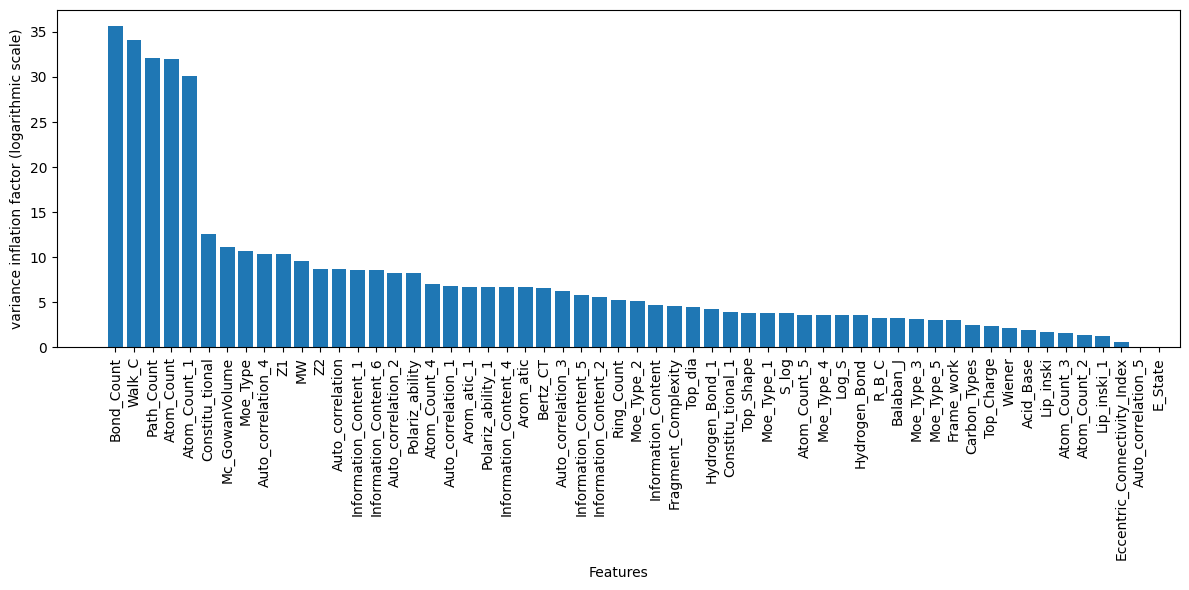

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(x=list(df_vif['vif'].index),height=np.log(df_vif['vif'].values))
plt.xlabel('Features')
plt.ylabel('variance inflation factor (logarithmic scale)')

plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('var_inflation_factor.eps')
# plt.show()

In [ ]:
df_vif.values<10

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False]])

In [ ]:
pd.DataFrame({"vif":vif},index=X.columns).sort_values("vif",ascending=False).values<10

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False]])

In [ ]:
df_vif_l10=df_vif[df_vif.values<10]
# sns.pairplot(df[list(df_vif_l10.index)])

In [ ]:
df_vif_l10

,vif
Wiener,8.815961
Acid_Base,6.998992
Lip_inski,5.692008
Atom_Count_3,5.008528
Atom_Count_2,3.998793
Lip_inski_1,3.718417
Eccentric_Connectivity_Index,1.856831


In [ ]:
list(df_vif_l10.index)

['Wiener',
 'Acid_Base',
 'Lip_inski',
 'Atom_Count_3',
 'Atom_Count_2',
 'Lip_inski_1',
 'Eccentric_Connectivity_Index']

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error


In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [ ]:
X_train=X_train[list(df_vif_l10.index)]
X_test=X_test[list(df_vif_l10.index)]

In [ ]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pLR=LR.predict(X_test)
LRr2=r2_score(y_test,y_pLR)
LRmse=mean_squared_error(y_test,y_pLR)

In [ ]:
Las=Lasso()
Las.fit(X_train,y_train)
y_pLas=Las.predict(X_test)
Lasr2=r2_score(y_test,y_pLas)
Lasmse=mean_squared_error(y_test,y_pLas)

In [ ]:
Rid=Ridge(solver='cholesky')
Rid.fit(X_train,y_train)
y_pRid=Rid.predict(X_test)
Ridr2=r2_score(y_test,y_pRid)
Ridmse=mean_squared_error(y_test,y_pRid)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.51254e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
pca_comp=list(df_vif_l10.index)

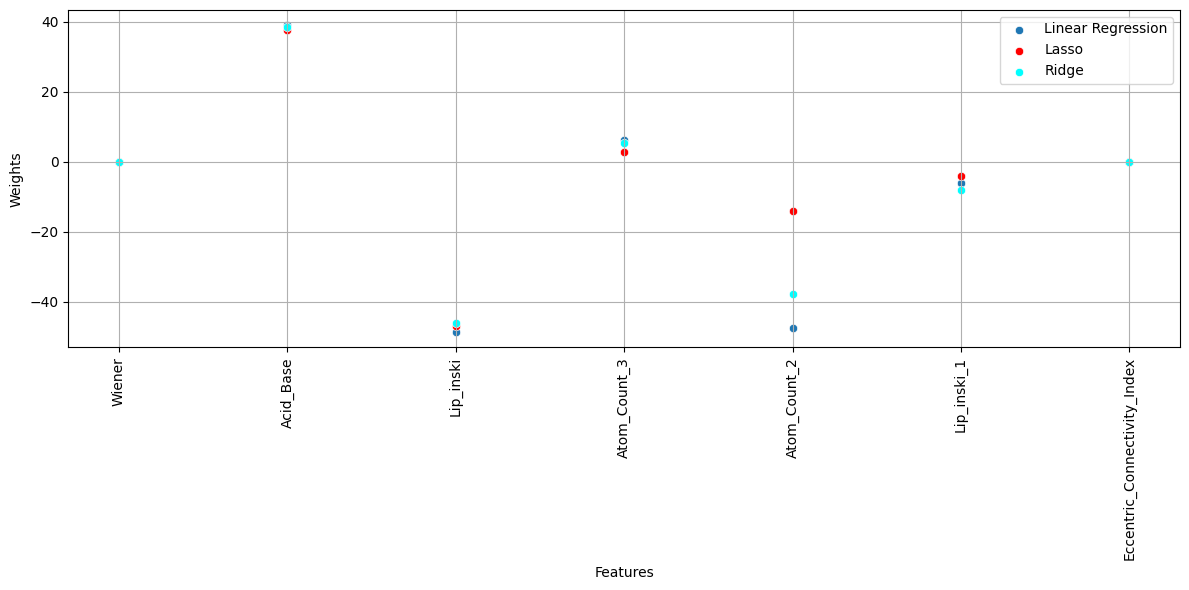

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=pca_comp,y=LR.coef_,label='Linear Regression')
sns.scatterplot(x=pca_comp,y=Las.coef_,color='red',label='Lasso')
sns.scatterplot(x=pca_comp,y=Rid.coef_,color='cyan',label='Ridge')
plt.xlabel('Features')
plt.ylabel('Weights')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('vif_Weights.eps')
plt.show()

In [ ]:
LRr2,Lasr2,Ridr2

(0.19479105244882833, 0.1964766008727853, 0.1968263232075841)

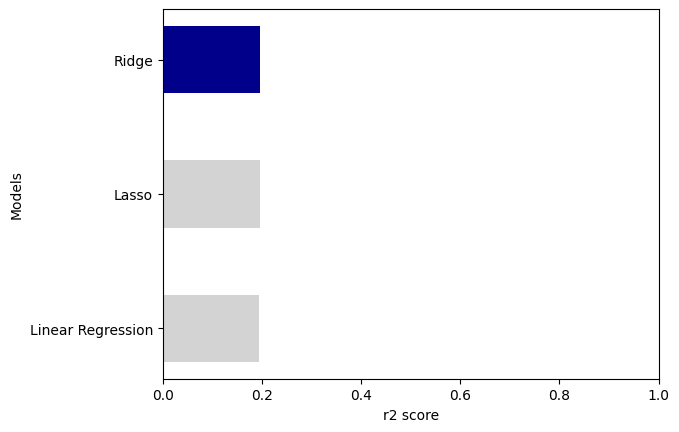

In [ ]:
plt.barh(y=['Linear Regression','Lasso','Ridge'],width=[LRr2,Lasr2,Ridr2],color=['lightgrey','lightgrey','darkblue'],height=0.5)
plt.xlabel('r2 score')
plt.ylabel('Models')
plt.xlim(0,1)
plt.show()

In [ ]:
LRmse,Lasmse,Ridmse

(6822.72822232121, 6808.44616691535, 6805.482885830527)

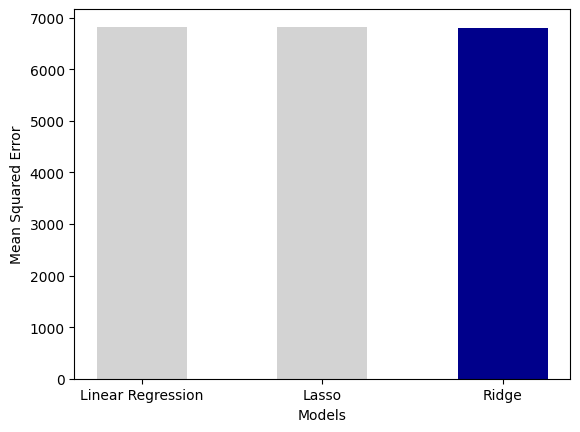

In [ ]:
plt.bar(x=['Linear Regression','Lasso','Ridge'],height=[LRmse,Lasmse,Ridmse],color=['lightgrey','lightgrey','darkblue'],width=0.5)
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')
plt.show()

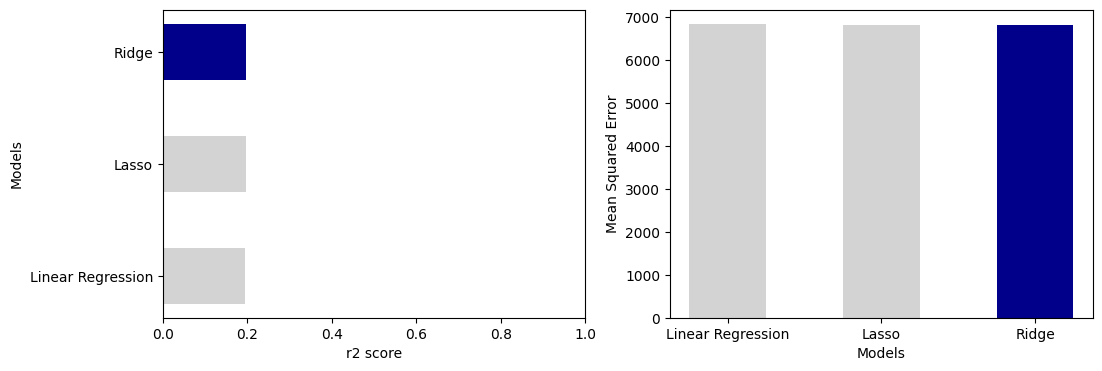

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.barh(y=['Linear Regression','Lasso','Ridge'],width=[LRr2,Lasr2,Ridr2],color=['lightgrey','lightgrey','darkblue'],height=0.5)
plt.xlim(0,1)
plt.xlabel('r2 score')
plt.ylabel('Models')
# plt.show()
plt.subplot(1,2,2)
plt.bar(x=['Linear Regression','Lasso','Ridge'],height=[LRmse,Lasmse,Ridmse],color=['lightgrey','lightgrey','darkblue'],width=0.5)
plt.ylabel('Mean Squared Error')
plt.xlabel('Models')
# plt.show()
plt.savefig('vif_r2_mse.eps')

In [ ]:
pca_comp

['Wiener',
 'Acid_Base',
 'Lip_inski',
 'Atom_Count_3',
 'Atom_Count_2',
 'Lip_inski_1',
 'Eccentric_Connectivity_Index']

In [ ]:
df_weights=pd.DataFrame({
    'Features':pca_comp,
    'Linear Regression':LR.coef_,
    'Lasso':Las.coef_,
    'Ridge':Rid.coef_
})
for i in df_weights.columns:
  if i!='Features':
    print(f"{i}: {df_weights.sort_values(i,ascending=True).head(1)['Features'].values}")

Linear Regression: ['Lip_inski']
Lasso: ['Lip_inski']
Ridge: ['Lip_inski']


In [ ]:
float(LR.intercept_),float(Las.intercept_),float(Rid.intercept_)

(143.97920758841246, 142.764643344273, 143.47016574484388)